In [1]:
# Import Dependencies
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

Populating the interactive namespace from numpy and matplotlib


# Education

In [2]:
# Create a reference the CSV file desired
enrollment_csv = "Enrollment -- 12-Month Enrollment Rates 2001-17/Comprehensive 12-Month Enrollment Rates 2001-17.csv"

# Read the CSV into a Pandas DataFrame
enrollment_df = pd.read_csv(enrollment_csv)

# Print the first five rows of data to the screen
enrollment_df.head()

,unitid,institution name,year,EF2001D1.Type of student counted,EF2001D1.Grand total,IDX_EF
0,100654,Alabama A & M University,2001.0,Undergraduate,4693.0,-2.0
1,100663,University of Alabama at Birmingham,2001.0,Undergraduate,12910.0,-2.0
2,100706,University of Alabama in Huntsville,2001.0,Undergraduate,6529.0,-2.0
3,100724,Alabama State University,2001.0,Undergraduate,5228.0,-2.0
4,100751,The University of Alabama,2001.0,Undergraduate,16983.0,-2.0


In [3]:
# How many institutions are we starting with?
totalInstitutions = len(enrollment_df)
print(totalInstitutions)

90267


In [4]:
# Delete columns that we're not interested in (The variable IDX_EF contains the UNITID of the parent institution.)
enrollment_df = enrollment_df.drop(["IDX_EF"], axis=1)
enrollment_df.head()

,unitid,institution name,year,EF2001D1.Type of student counted,EF2001D1.Grand total
0,100654,Alabama A & M University,2001.0,Undergraduate,4693.0
1,100663,University of Alabama at Birmingham,2001.0,Undergraduate,12910.0
2,100706,University of Alabama in Huntsville,2001.0,Undergraduate,6529.0
3,100724,Alabama State University,2001.0,Undergraduate,5228.0
4,100751,The University of Alabama,2001.0,Undergraduate,16983.0


In [5]:
# Remove the rows with missing data
enrollment_df = enrollment_df.dropna(how="any")
institutionsMinusBlanks = len(enrollment_df)
print(institutionsMinusBlanks)

90250


In [6]:
# How many institutions had data that wasn't incuded?
instutionsWithoutData = (totalInstitutions - institutionsMinusBlanks)
print(instutionsWithoutData)

17


In [7]:
#As type to change the years type to get rid of those pesky .0 and replace the current year column with this new clean one
enrollment_df["year"]=enrollment_df["year"].astype(int)
enrollment_df.head()

,unitid,institution name,year,EF2001D1.Type of student counted,EF2001D1.Grand total
0,100654,Alabama A & M University,2001,Undergraduate,4693.0
1,100663,University of Alabama at Birmingham,2001,Undergraduate,12910.0
2,100706,University of Alabama in Huntsville,2001,Undergraduate,6529.0
3,100724,Alabama State University,2001,Undergraduate,5228.0
4,100751,The University of Alabama,2001,Undergraduate,16983.0


In [8]:
# Count how many Institution entries do we have per year
InstitutionYearCounts = enrollment_df["year"].value_counts()
InstitutionYearCounts = InstitutionYearCounts.sort_values(axis=0, ascending=True)
print(InstitutionYearCounts)

2001    4253
2002    4522
2003    4604
2004    4682
2005    4762
2006    4841
2007    4910
2008    5025
2009    5176
2010    5409
2011    5607
2012    5751
2013    5891
2014    6038
2015    6174
2016    6275
2017    6330
Name: year, dtype: int64


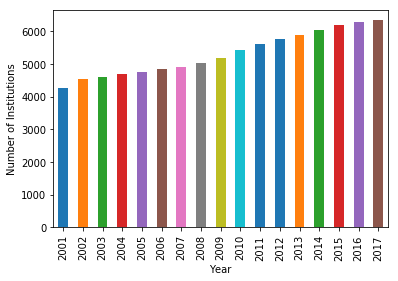

<Figure size 432x288 with 0 Axes>

In [9]:
# Create a bar chart based off of the group series from before
institutionCountBar = InstitutionYearCounts.plot(kind='bar')

# Set the xlabel and ylabel using class methods
institutionCountBar.set_xlabel("Year")
institutionCountBar.set_ylabel("Number of Institutions")


plt.show()
plt.tight_layout()

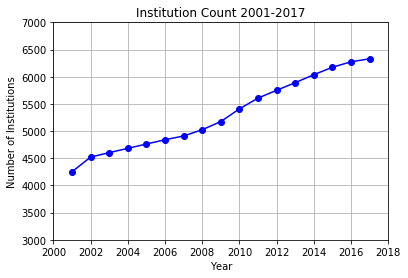

In [10]:
institutionCountLine = InstitutionYearCounts.plot.line(style='.-', x='index', marker ='o', color='blue')
institutionCountLine.set_ylim(ymin=3000, ymax=7000)
institutionCountLine.set_xlim(xmin=2000, xmax=2018)
plt.title("Institution Count 2001-2017")
plt.xlabel("Year")
plt.ylabel("Number of Institutions")
plt.grid()

In [11]:
#Total enrollment numbers between 2001 and 2017 = sum EF2001D1.Grand total per year
pd.to_numeric(enrollment_df['EF2001D1.Grand total'])
enrollment_df.dtypes
totalEnrollment = enrollment_df["EF2001D1.Grand total"].sum()
totalEnrollment

365252506.0

In [12]:
#Loop through years and add EF2001D1.Grand total if years match?
enrollmentByYear = enrollment_df.groupby("year")
enrollmentByYear = enrollmentByYear.agg(sum)
enrollmentByYear

,EF2001D1.Grand total
year,
2001,17965501.0
2002,18774604.0
2003,19385482.0
2004,19493543.0
2005,19792638.0
2006,19957444.0
2007,20240347.0
2008,20714313.0
2009,21913240.0


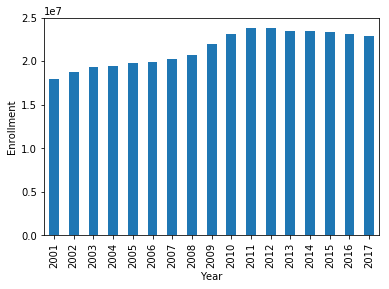

<Figure size 432x288 with 0 Axes>

In [13]:
# Create a bar chart based off of the group series from before
enrollmentByYearBar = enrollmentByYear.plot(kind='bar', legend =False)

# Set the xlabel and ylabel using class methods
enrollmentByYearBar.set_xlabel("Year")
enrollmentByYearBar.set_ylabel("Enrollment")


plt.show()
plt.tight_layout()

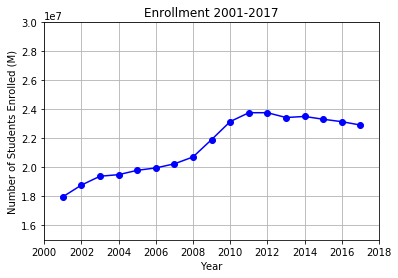

In [14]:
enrollmentByYearLine = enrollmentByYear.plot.line(style='.-', marker ='o', color='blue', legend=False)
enrollmentByYearLine.set_ylim(ymin=15000000, ymax=30000000)
enrollmentByYearLine.set_xlim(xmin=2000, xmax=2018)
plt.title("Enrollment 2001-2017")
plt.xlabel("Year")
plt.ylabel("Number of Students Enrolled (M)")
plt.savefig("Enrollment 2001 to 2017.png")
plt.grid()

In [15]:
#Rate of change
#creating list for data series to calc annual change
enrollmentRate=enrollmentByYear["EF2001D1.Grand total"]
enrollmentRate

# create list to append annual rates of change to
enrollmentRateOfChange = []
#calculate annual rates of change, append to empty change list created above, 
#and create a new column for the annual change rate data
start_rate=17965501
#the above needs to be the first value in your list (index location 0)

for rate in enrollmentRate:
    try:
        change=((rate/start_rate)-1)*100
        enrollmentRateOfChange.append(change)
        start_rate=rate
    except:
        print("Error happened")

enrollmentByYear["Enrollment Annual Rate of Change"]=enrollmentRateOfChange

enrollmentByYear


,EF2001D1.Grand total,Enrollment Annual Rate of Change
year,,
2001,17965501.0,0.000000
2002,18774604.0,4.503648
2003,19385482.0,3.253746
2004,19493543.0,0.557433
2005,19792638.0,1.534329
2006,19957444.0,0.832663
2007,20240347.0,1.417531
2008,20714313.0,2.341689
2009,21913240.0,5.787916


In [16]:
enrollmentByYear.to_csv('enrollmentRateByYear.csv', sep=',')

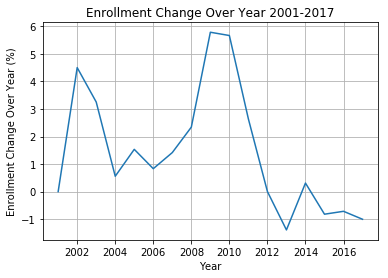

In [17]:
xenrol=enrollmentByYear.index
yenrol=enrollmentByYear["Enrollment Annual Rate of Change"]
plt.plot(xenrol,yenrol)
plt.plot(x_compat=True)
plt.title("Enrollment Change Over Year 2001-2017")
plt.xlabel("Year")
plt.ylabel("Enrollment Change Over Year (%)")
plt.grid()

In [18]:
InstitutionYearCounts

2001    4253
2002    4522
2003    4604
2004    4682
2005    4762
2006    4841
2007    4910
2008    5025
2009    5176
2010    5409
2011    5607
2012    5751
2013    5891
2014    6038
2015    6174
2016    6275
2017    6330
Name: year, dtype: int64

In [19]:
institutiondf = pd.DataFrame({'year':InstitutionYearCounts.index, 'list':InstitutionYearCounts.values})
institutiondf

,year,list
0,2001,4253
1,2002,4522
2,2003,4604
3,2004,4682
4,2005,4762
5,2006,4841
6,2007,4910
7,2008,5025
8,2009,5176
9,2010,5409


In [20]:
#Rate of change
#creating list for data series to calc annual change
institutionRate=institutiondf["list"]
institutionRate

# create list to append annual rates of change to
institutionRateOfChange = []
#calculate annual rates of change, append to empty change list created above, and create a new column for the annual change rate data
start_rate=4253
#the above needs to be the first value in your list (index location 0)

for rate in institutionRate:
    try:
        change=((rate/start_rate)-1)*100
        institutionRateOfChange.append(change)
        start_rate=rate
    except:
        print("Error happened")

institutiondf["Institution Annual Rate of Change"]=institutionRateOfChange

institutiondf

,year,list,Institution Annual Rate of Change
0,2001,4253,0.000000
1,2002,4522,6.324947
2,2003,4604,1.813357
3,2004,4682,1.694179
4,2005,4762,1.708672
5,2006,4841,1.658967
6,2007,4910,1.425325
7,2008,5025,2.342159
8,2009,5176,3.004975
9,2010,5409,4.501546


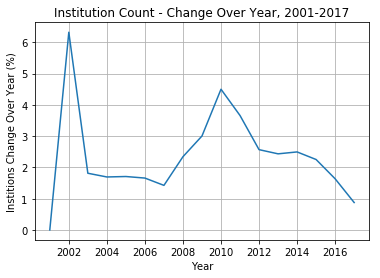

In [21]:
xinst=institutiondf["year"]
yinst=institutiondf["Institution Annual Rate of Change"]
plt.plot(xinst,yinst)
plt.plot(x_compat=True)
plt.title("Institution Count - Change Over Year, 2001-2017")
plt.xlabel("Year")
plt.ylabel("Institions Change Over Year (%)")
plt.grid()

# Employment

In [22]:
# Create a reference the CSV file desired
employment_csv = "Employment Data/Employment Summary Data - Annual Averages.csv"

# Read the CSV into a Pandas DataFrame
employment_df = pd.read_csv(employment_csv)

# Print the first five rows of data to the screen
employment_df.head()

,Year,Initial Jobless Claims,Unemployment Rate,Labor Force Participation
0,2000,346000,3.9,67.0
1,2001,405246,4.7,66.8
2,2002,404283,5.8,66.6
3,2003,402154,6.0,66.2
4,2004,342117,5.5,66.0


(2000, 2018)

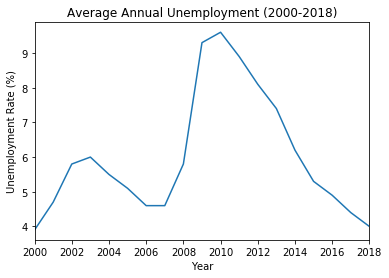

In [23]:

#time series line plots for unemployment rate
xu=employment_df["Year"]
yu=employment_df["Unemployment Rate"]
plt.plot(xu,yu)
plt.plot(x_compat=True)
plt.title("Average Annual Unemployment (2000-2018)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.xlim([2000, 2018])

(2000, 2018)

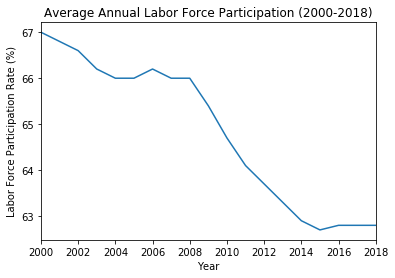

In [24]:

#time series line plots for labor force participation
xp=employment_df["Year"]
yp=employment_df["Labor Force Participation"]
plt.plot(xp,yp)
plt.title("Average Annual Labor Force Participation (2000-2018)")
plt.xlabel("Year")
plt.ylabel("Labor Force Participation Rate (%)")
plt.xlim([2000, 2018])

19

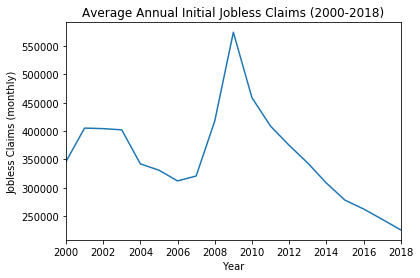

In [25]:

#time series line plots for initial jobless claims
xc=employment_df["Year"]
yc=employment_df["Initial Jobless Claims"]
plt.plot(xc,yc)
plt.title("Average Annual Initial Jobless Claims (2000-2018)")
plt.xlabel("Year")
plt.ylabel("Jobless Claims (monthly)")
plt.xlim([2000, 2018])
len(employment_df)

In [26]:
#creating list for data series to calc annual change
u_rate=employment_df["Unemployment Rate"]
u_rate

0     3.9
1     4.7
2     5.8
3     6.0
4     5.5
5     5.1
6     4.6
7     4.6
8     5.8
9     9.3
10    9.6
11    8.9
12    8.1
13    7.4
14    6.2
15    5.3
16    4.9
17    4.4
18    4.0
Name: Unemployment Rate, dtype: float64

In [27]:
#creating list for data series to calc annual change
u_rate=employment_df["Unemployment Rate"]
u_rate

# create list to append annual rates of change to
u_rate_change=[]

In [28]:
#calculate annual rates of change, append to empty change list created above, and create a new column for the annual change rate data
start_rate=3.9
#the above needs to be the first value in your list (index location 0)

for rate in u_rate:
    try:
        change=((rate/start_rate)-1)*100
        u_rate_change.append(change)
        start_rate=rate
    except:
        print("Error happened")

employment_df["Unemployment Annual Rate of Change"]=u_rate_change

In [29]:
len(u_rate_change)

19

In [30]:
employment_df.head()

,Year,Initial Jobless Claims,Unemployment Rate,Labor Force Participation,Unemployment Annual Rate of Change
0,2000,346000,3.9,67.0,0.000000
1,2001,405246,4.7,66.8,20.512821
2,2002,404283,5.8,66.6,23.404255
3,2003,402154,6.0,66.2,3.448276
4,2004,342117,5.5,66.0,-8.333333


In [31]:
employment_df.to_csv('unemploymentRateByYear.csv', sep=',')

(2000, 2018)

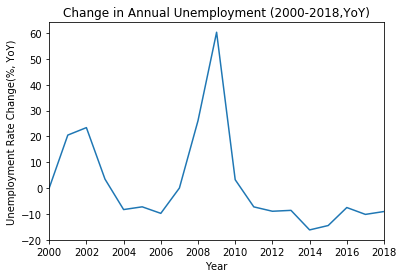

In [32]:
#time series line plots for unemployment rate change YoY
xuc=employment_df["Year"]
yuc=employment_df["Unemployment Annual Rate of Change"]
plt.plot(xuc,yuc)
plt.plot(x_compat=True)
plt.title("Change in Annual Unemployment (2000-2018,YoY)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate Change(%, YoY)")
plt.xlim([2000, 2018])

In [33]:
employment_df.head()

,Year,Initial Jobless Claims,Unemployment Rate,Labor Force Participation,Unemployment Annual Rate of Change
0,2000,346000,3.9,67.0,0.000000
1,2001,405246,4.7,66.8,20.512821
2,2002,404283,5.8,66.6,23.404255
3,2003,402154,6.0,66.2,3.448276
4,2004,342117,5.5,66.0,-8.333333


In [34]:
#creating list for data series to calc annual change
pc_rate=employment_df["Labor Force Participation"]
pc_rate

0     67.0
1     66.8
2     66.6
3     66.2
4     66.0
5     66.0
6     66.2
7     66.0
8     66.0
9     65.4
10    64.7
11    64.1
12    63.7
13    63.3
14    62.9
15    62.7
16    62.8
17    62.8
18    62.8
Name: Labor Force Participation, dtype: float64

In [35]:
# create list to append annual rates of change to
pc_rate_change=[]

In [36]:
#calculate annual rates of change, append to empty change list created above, and create a new column for the annual change rate data
start_rate=67

#the above needs to be the first value in your list (index location 0)

for rate in pc_rate:
    try:
        change=((rate/start_rate)-1)*100
        pc_rate_change.append(change)
        start_rate=rate
    except:
        print("Error happened")

employment_df["Participation Annual Rate of Change"]=pc_rate_change

(2000, 2018)

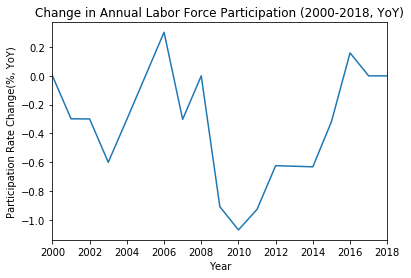

In [37]:
#time series line plots for unemployment rate change YoY
xpc=employment_df["Year"]
ypc=employment_df["Participation Annual Rate of Change"]
plt.plot(xpc,ypc)
plt.plot(x_compat=True)
plt.title("Change in Annual Labor Force Participation (2000-2018, YoY)")
plt.xlabel("Year")
plt.ylabel("Participation Rate Change(%, YoY)")
plt.xlim([2000, 2018])

In [38]:
employment_df.head()

,Year,Initial Jobless Claims,Unemployment Rate,Labor Force Participation,Unemployment Annual Rate of Change,Participation Annual Rate of Change
0,2000,346000,3.9,67.0,0.000000,0.000000
1,2001,405246,4.7,66.8,20.512821,-0.298507
2,2002,404283,5.8,66.6,23.404255,-0.299401
3,2003,402154,6.0,66.2,3.448276,-0.600601
4,2004,342117,5.5,66.0,-8.333333,-0.302115


In [39]:
#creating list for data series to calc annual change
cc_rate=employment_df["Initial Jobless Claims"]
cc_rate

0     346000
1     405246
2     404283
3     402154
4     342117
5     330988
6     312092
7     320683
8     417708
9     574279
10    458808
11    408679
12    374863
13    343625
14    308342
15    278204
16    262638
17    244417
18    225675
Name: Initial Jobless Claims, dtype: int64

In [40]:
# create list to append annual rates of change to
cc_rate_change=[]

In [41]:
#calculate annual rates of change, append to empty change list created above, and create a new column for the annual change rate data
start_rate=346000

#the above needs to be the first value in your list (index location 0)

for rate in cc_rate:
    try:
        change=((rate/start_rate)-1)*100
        cc_rate_change.append(change)
        start_rate=rate
    except:
        print("Error happened")

employment_df["Jobless Claims Annual Rate of Change"]=cc_rate_change

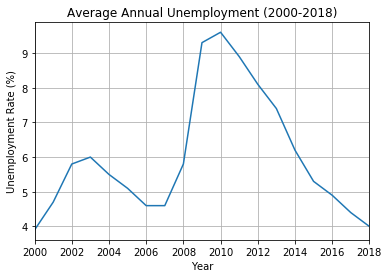

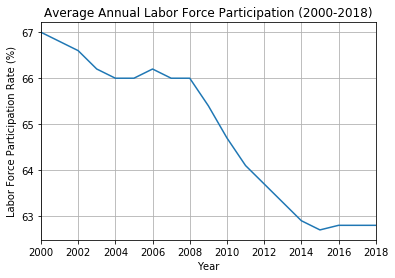

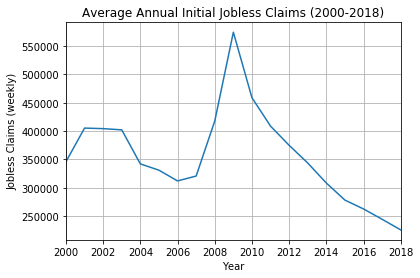

In [42]:
#time series line plots for unemployment rate
xu=employment_df["Year"]
yu=employment_df["Unemployment Rate"]
plt.plot(xu,yu)
plt.plot(x_compat=True)
plt.title("Average Annual Unemployment (2000-2018)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.xlim([2000, 2018])
plt.grid()
plt.savefig("Average Annual Unemployment (2000-2018)_fig.png")
plt.show()

#time series line plots for labor force participation
xp=employment_df["Year"]
yp=employment_df["Labor Force Participation"]
plt.plot(xp,yp)
plt.title("Average Annual Labor Force Participation (2000-2018)")
plt.xlabel("Year")
plt.ylabel("Labor Force Participation Rate (%)")
plt.xlim([2000, 2018])
plt.grid()
plt.savefig("Average Annual Labor Force Participation (2000-2018)_fig.png")
plt.show()

#time series line plots for initial jobless claims
xc=employment_df["Year"]
yc=employment_df["Initial Jobless Claims"]
plt.plot(xc,yc)
plt.title("Average Annual Initial Jobless Claims (2000-2018)")
plt.xlabel("Year")
plt.ylabel("Jobless Claims (weekly)")
plt.xlim([2000, 2018])
plt.grid()
plt.savefig("Average Annual Initial Jobless Claims (2000-2018)_fig.png")
plt.show()

In [43]:
#Observations over time:
# Annual average unemployment rate has ranged between 4% and 10% since 2000.
# Annual average labor force participation (pull def for presentation) has ranged between 67% and 63% since 2000.
# Annual average initial jobless claims have ranged between 225k and 550k since 2000.
# Unemployment and jobless claims saw a small increase from 2000-2003, declined until 2007, and then spiked dramatically in 2008-2010.
# The spike was followed by a decline that is still occurring.
# Labor force participation has declined 



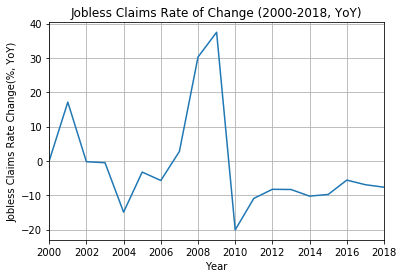

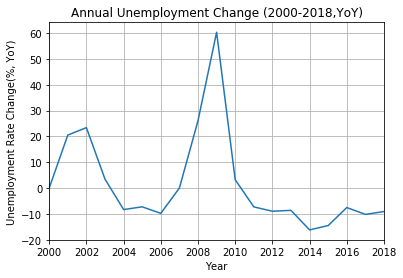

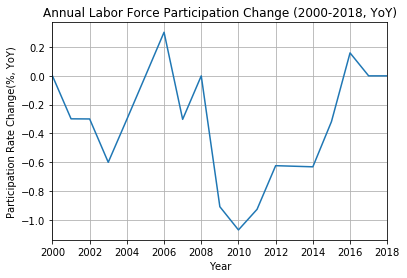

In [44]:
#time series line plots for unemployment rate change YoY
xcc=employment_df["Year"]
ycc=employment_df["Jobless Claims Annual Rate of Change"]
plt.plot(xcc,ycc)
plt.plot(x_compat=True)
plt.title("Jobless Claims Rate of Change (2000-2018, YoY)")
plt.xlabel("Year")
plt.ylabel("Jobless Claims Rate Change(%, YoY)")
plt.xlim([2000, 2018])
plt.grid()
plt.savefig("Jobless Claims Rate of Change (2000-2018, YoY)_fig.png")
plt.show()

#time series line plots for unemployment rate change YoY
xuc=employment_df["Year"]
yuc=employment_df["Unemployment Annual Rate of Change"]
plt.plot(xuc,yuc)
plt.plot(x_compat=True)
plt.title("Annual Unemployment Change (2000-2018,YoY)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate Change(%, YoY)")
plt.xlim([2000, 2018])
plt.grid()
plt.savefig("Annual Unemployment Change (2000-2018,YoY)_fig.png")
plt.show()

#time series line plots for unemployment rate change YoY
xpc=employment_df["Year"]
ypc=employment_df["Participation Annual Rate of Change"]
plt.plot(xpc,ypc)
plt.plot(x_compat=True)
plt.title("Annual Labor Force Participation Change (2000-2018, YoY)")
plt.xlabel("Year")
plt.ylabel("Participation Rate Change(%, YoY)")
plt.xlim([2000, 2018])
plt.grid()
plt.savefig("Annual Labor Force Participation Change (2000-2018, YoY)_fig.png")
plt.show()


# Completions

In [45]:
# Use Pandas data frame to read csv data
completion_df1 = pd.read_csv("ComprehensiveData_2005-17_v1.csv")
completion_df1.head()

,unitid,institution name,year,DFR2005.Associate's degree,DFR2005.Bachelor's degree,DFR2005.Master's degree,DFR2005.Certificates of less-than 1-year,DFR2005.Certificates of 1 but less than 2 years,Unnamed: 8
0,100654,Alabama A & M University,2005.0,0.0,600.0,312.0,0.0,0.0,NaN
1,100663,University of Alabama at Birmingham,2005.0,0.0,1622.0,1223.0,0.0,12.0,NaN
2,100706,University of Alabama in Huntsville,2005.0,0.0,798.0,374.0,0.0,0.0,NaN
3,100751,The University of Alabama,2005.0,0.0,2931.0,1283.0,0.0,0.0,NaN
4,100858,Auburn University,2005.0,0.0,3917.0,791.0,0.0,0.0,NaN


In [46]:
# convert NaN to '0' value
completion_df1.fillna(value=0)

,unitid,institution name,year,DFR2005.Associate's degree,DFR2005.Bachelor's degree,DFR2005.Master's degree,DFR2005.Certificates of less-than 1-year,DFR2005.Certificates of 1 but less than 2 years,Unnamed: 8
0,100654,Alabama A & M University,2005.0,0.0,600.0,312.0,0.0,0.0,0.0
1,100663,University of Alabama at Birmingham,2005.0,0.0,1622.0,1223.0,0.0,12.0,0.0
2,100706,University of Alabama in Huntsville,2005.0,0.0,798.0,374.0,0.0,0.0,0.0
3,100751,The University of Alabama,2005.0,0.0,2931.0,1283.0,0.0,0.0,0.0
4,100858,Auburn University,2005.0,0.0,3917.0,791.0,0.0,0.0,0.0
5,100937,Birmingham Southern College,2005.0,0.0,299.0,14.0,0.0,0.0,0.0
6,101116,South University-Montgomery,2005.0,63.0,9.0,0.0,0.0,0.0,0.0
7,101189,Faulkner University,2005.0,61.0,582.0,69.0,0.0,0.0,0.0
8,101213,FAULKNER UNIVERSITY,2005.0,0.0,0.0,0.0,0.0,0.0,0.0
9,101365,Herzing University-Birmingham,2005.0,69.0,57.0,0.0,0.0,0.0,0.0


In [47]:
# How many institutions are we starting with?
totalInstitutions = len(completion_df1)
print(totalInstitutions)

33085


In [48]:
# DELETE UNWANTED COLUMNS 
completion_df2 = completion_df1.drop(["DFR2005.Master's degree", "Unnamed: 8"], axis = 1)
completion_df2.head()

,unitid,institution name,year,DFR2005.Associate's degree,DFR2005.Bachelor's degree,DFR2005.Certificates of less-than 1-year,DFR2005.Certificates of 1 but less than 2 years
0,100654,Alabama A & M University,2005.0,0.0,600.0,0.0,0.0
1,100663,University of Alabama at Birmingham,2005.0,0.0,1622.0,0.0,12.0
2,100706,University of Alabama in Huntsville,2005.0,0.0,798.0,0.0,0.0
3,100751,The University of Alabama,2005.0,0.0,2931.0,0.0,0.0
4,100858,Auburn University,2005.0,0.0,3917.0,0.0,0.0


In [49]:
# RENAME COLUMNS
completion_df3 = completion_df2.rename(columns={
    "DFR2005.Associate's degree" : "Associate's Degree",
    "DFR2005.Bachelor's degree": "Bachelor's Degree", 
    "DFR2005.Certificates of less-than 1-year" : "Shorter Certificates",
    "DFR2005.Certificates of 1 but less than 2 years" : "Longer Certificates"})

completion_df3.head()

,unitid,institution name,year,Associate's Degree,Bachelor's Degree,Shorter Certificates,Longer Certificates
0,100654,Alabama A & M University,2005.0,0.0,600.0,0.0,0.0
1,100663,University of Alabama at Birmingham,2005.0,0.0,1622.0,0.0,12.0
2,100706,University of Alabama in Huntsville,2005.0,0.0,798.0,0.0,0.0
3,100751,The University of Alabama,2005.0,0.0,2931.0,0.0,0.0
4,100858,Auburn University,2005.0,0.0,3917.0,0.0,0.0


In [50]:
# Column rearrange    
completion_df4 = completion_df3[["unitid","year","institution name","Shorter Certificates","Longer Certificates","Associate's Degree","Bachelor's Degree"]]
completion_df4.head()

,unitid,year,institution name,Shorter Certificates,Longer Certificates,Associate's Degree,Bachelor's Degree
0,100654,2005.0,Alabama A & M University,0.0,0.0,0.0,600.0
1,100663,2005.0,University of Alabama at Birmingham,0.0,12.0,0.0,1622.0
2,100706,2005.0,University of Alabama in Huntsville,0.0,0.0,0.0,798.0
3,100751,2005.0,The University of Alabama,0.0,0.0,0.0,2931.0
4,100858,2005.0,Auburn University,0.0,0.0,0.0,3917.0


In [51]:
InstitutionCountsPerYear = completion_df4.groupby("year")["institution name"].count()
InstitutionCountsPerYear

year
2005.0    2544
2006.0    2544
2007.0    2544
2008.0    2544
2009.0    2544
2010.0    2544
2011.0    2544
2012.0    2544
2013.0    2544
2014.0    2544
2015.0    2544
2016.0    2544
2017.0    2544
Name: institution name, dtype: int64

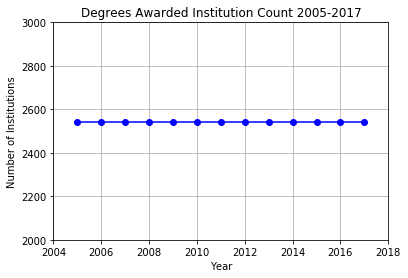

In [52]:
# create a line graph to visualize number of institutions
institutionCount = InstitutionCountsPerYear.plot.line(style='.-', x='index', marker ='o', color='blue')
institutionCount.set_ylim(ymin=2000, ymax=3000)
institutionCount.set_xlim(xmin=2004, xmax=2018)
plt.title("Degrees Awarded Institution Count 2005-2017")
plt.xlabel("Year")
plt.ylabel("Number of Institutions")
plt.grid()
plt.savefig("Degrees Awarded Institution Count 2005-2017_fig.png")
plt.show()

In [53]:
# Total Degrees Awarded per Year [*created data set to calculate the total number of degree awarded per year per institution
# type by using groupby function to add degree completed by using 'year' as filter; 
#then created a dictionary for this combined dataset]

# Shorter Certificates
df5 = completion_df4.groupby(["year"])["Shorter Certificates"].sum().astype(int)

# Longer Certificates
df6 = completion_df4.groupby(["year"])["Longer Certificates"].sum().astype(int)

# Associate's Degree
df7 = completion_df4.groupby(["year"])["Associate's Degree"].sum().astype(int)

# Bachelor's degree
df8 = completion_df4.groupby(["year"])["Bachelor's Degree"].sum().astype(int)


# Convert to DataFrame
CompletionPerYear = pd.DataFrame({"Shorter Certificates":df5,
                     "Longer Certificates": df6,
                     "Associates Degree": df7,
                     "Bachelors Degree" : df8,             
                    })

CompletionPerYear

,Shorter Certificates,Longer Certificates,Associates Degree,Bachelors Degree
year,,,,
2005.0,48194,59231,120243,1316168
2006.0,46265,56939,120376,1347340
2007.0,43827,55046,123922,1373060
2008.0,43133,55825,118929,1404895
2009.0,49545,56789,120301,1433088
2010.0,61005,63941,125320,1467433
2011.0,47384,87168,142815,1511783
2012.0,47199,80349,149152,1565139
2013.0,39486,65412,136910,1587285


In [54]:
# COMPLETION SUMMARY data; add up Total Degree per year
completion_df5 = pd.concat([CompletionPerYear,pd.DataFrame(CompletionPerYear.sum(axis=1),columns=['Total_Degree'])],axis=1)
completion_df5

,Shorter Certificates,Longer Certificates,Associates Degree,Bachelors Degree,Total_Degree
year,,,,,
2005.0,48194,59231,120243,1316168,1543836
2006.0,46265,56939,120376,1347340,1570920
2007.0,43827,55046,123922,1373060,1595855
2008.0,43133,55825,118929,1404895,1622782
2009.0,49545,56789,120301,1433088,1659723
2010.0,61005,63941,125320,1467433,1717699
2011.0,47384,87168,142815,1511783,1789150
2012.0,47199,80349,149152,1565139,1841839
2013.0,39486,65412,136910,1587285,1829093


In [55]:
completion_df5.to_csv('Completion data for_CombinedPlot.csv', sep=',')

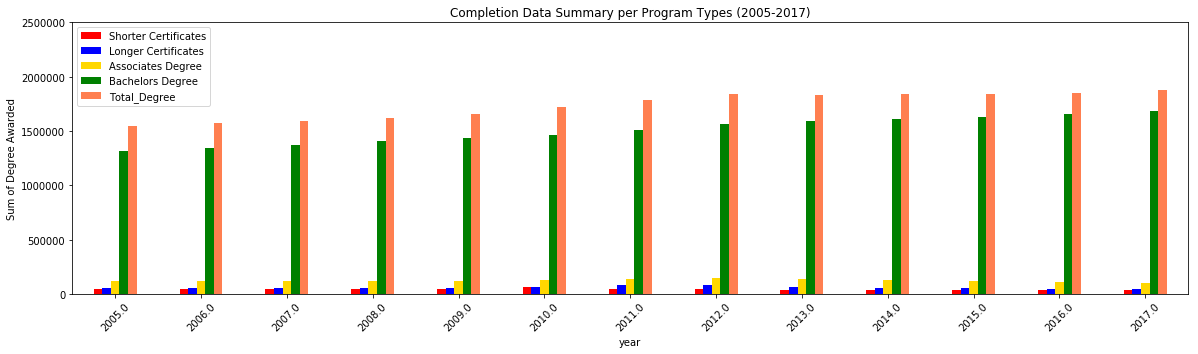

<Figure size 432x288 with 0 Axes>

In [56]:
multi_plot = completion_df5.plot(kind="bar", figsize=(20,5), color=['red', 'blue', 'gold', 'green', 'coral'])
multi_plot.set_xticklabels(completion_df5.index, rotation=45)
plt.ylim(-0, 2500000, 10000)
plt.title("Completion Data Summary per Program Types (2005-2017)")
plt.ylabel("Sum of Degree Awarded")
plt.savefig("Completion Data Summary per Program Types (2005-2017)")
plt.show()
plt.tight_layout()

In [57]:
# Set index for the plots below to work
completion_df6 = completion_df5.reset_index()
completion_df6

,year,Shorter Certificates,Longer Certificates,Associates Degree,Bachelors Degree,Total_Degree
0,2005.0,48194,59231,120243,1316168,1543836
1,2006.0,46265,56939,120376,1347340,1570920
2,2007.0,43827,55046,123922,1373060,1595855
3,2008.0,43133,55825,118929,1404895,1622782
4,2009.0,49545,56789,120301,1433088,1659723
5,2010.0,61005,63941,125320,1467433,1717699
6,2011.0,47384,87168,142815,1511783,1789150
7,2012.0,47199,80349,149152,1565139,1841839
8,2013.0,39486,65412,136910,1587285,1829093
9,2014.0,38577,59048,127954,1611376,1836955


In [58]:
#Rate of change
completionRate=completion_df5["Total_Degree"]
completionRate

# create list to append annual rates of change to
completionRateOfChange = []

#calculate annual rates of change, append to empty change list created above, and create a new column 
# for the annual change rate data

start_rate=1543836

#the above needs to be the first value in your list (index location 0)

for rate in completionRate:
    try:
        change=((rate/start_rate)-1)*100
        completionRateOfChange.append(change)
        start_rate=rate
    except:
        print("Error happened")

completion_df5["Completion Annual Rate of Change"]=completionRateOfChange

completion_df5

,Shorter Certificates,Longer Certificates,Associates Degree,Bachelors Degree,Total_Degree,Completion Annual Rate of Change
year,,,,,,
2005.0,48194,59231,120243,1316168,1543836,0.000000
2006.0,46265,56939,120376,1347340,1570920,1.754331
2007.0,43827,55046,123922,1373060,1595855,1.587286
2008.0,43133,55825,118929,1404895,1622782,1.687309
2009.0,49545,56789,120301,1433088,1659723,2.276399
2010.0,61005,63941,125320,1467433,1717699,3.493113
2011.0,47384,87168,142815,1511783,1789150,4.159693
2012.0,47199,80349,149152,1565139,1841839,2.944918
2013.0,39486,65412,136910,1587285,1829093,-0.692026


In [59]:
completion_df5.to_csv('completionRateByYear.csv', sep=',')


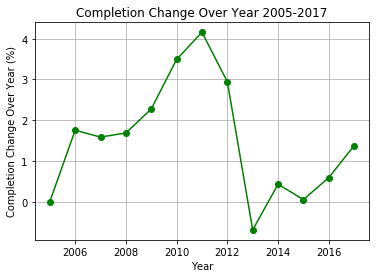

In [60]:
xComplete=completion_df5.index
yComplete=completion_df5["Completion Annual Rate of Change"]
plt.plot(xComplete,yComplete, color='green', marker ='o')
plt.plot(x_compat=True)
plt.title("Completion Change Over Year 2005-2017")
plt.xlabel("Year")
plt.ylabel("Completion Change Over Year (%)")
plt.grid()
plt.savefig("Completion Change Over Year 2005-2017")
plt.show()

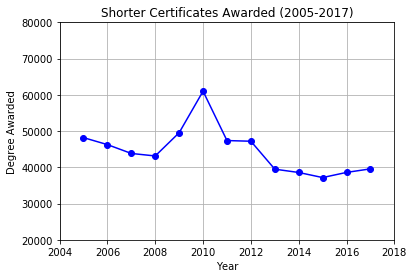

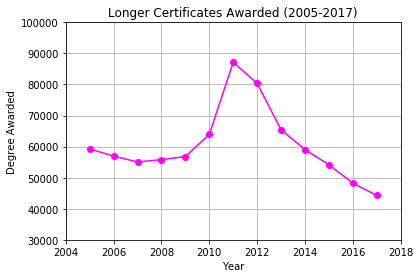

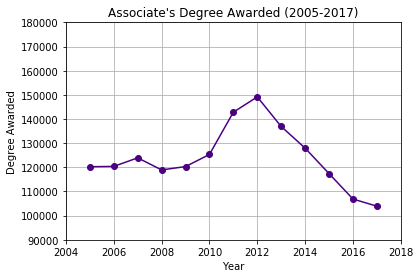

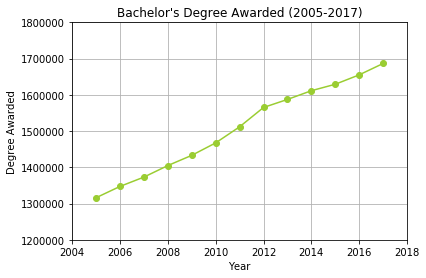

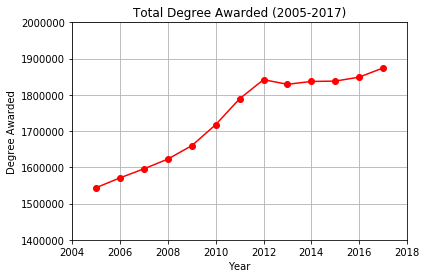

In [61]:
# trends for Shorter Certificates
xc=completion_df6["year"]
yc=completion_df6["Shorter Certificates"]
plt.plot(xc,yc, color="blue",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([20000, 80000])
plt.title("Shorter Certificates Awarded (2005-2017)")
plt.grid()
plt.savefig("Shorter Certificates Awarded (2005-2017)")
plt.show()

# trends for Longer Certificates
xc=completion_df6["year"]
yc=completion_df6["Longer Certificates"]
plt.plot(xc,yc, color="magenta",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([30000, 100000])
plt.title("Longer Certificates Awarded (2005-2017)")
plt.grid()
plt.savefig("Longer Certificates Awarded (2005-2017)")
plt.show()

# trends for Associate's Degree
xc=completion_df6["year"]
yc=completion_df6["Associates Degree"]
plt.plot(xc,yc, color="indigo",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([90000, 180000])
plt.title("Associate's Degree Awarded (2005-2017)")
plt.grid()
plt.savefig("Associate's Degree Awarded (2005-2017)")
plt.show()

# trends for Bachelor's Degree
xc=completion_df6["year"]
yc=completion_df6["Bachelors Degree"]
plt.plot(xc,yc, color="yellowgreen",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([1200000, 1800000])
plt.title("Bachelor's Degree Awarded (2005-2017)")
plt.grid()
plt.savefig("Bachelor's Degree Awarded (2005-2017)")
plt.show()

# trends for All Degree
xc=completion_df6["year"]
yc=completion_df6["Total_Degree"]
plt.plot(xc,yc, color="red",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([1400000, 2000000])
plt.title("Total Degree Awarded (2005-2017)")
plt.grid()
plt.savefig("Total Degree Awarded (2005-2017)")
plt.show()

In [62]:
TotalAwardsPerYear = completion_df6.sum()
TotalAwardsPerYear

year                       26143.0
Shorter Certificates      579961.0
Longer Certificates       786376.0
Associates Degree        1614146.0
Bachelors Degree        19588344.0
Total_Degree            22568827.0
dtype: float64

In [63]:
Bachelors_Percentage = (19588344.0/22568827.0)*100
Bachelors_Percentage

86.7938063418183

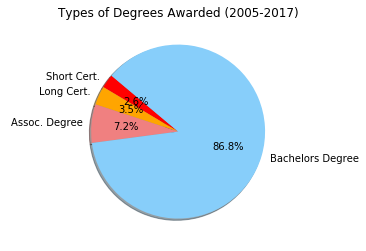

In [77]:
#Pie charts:
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Python" section from the others
#explode = (0, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
programs= ["Short Cert.", "Long Cert.", "Assoc. Degree", "Bachelors Degree"]
granted = [579961.0,786376.0,1614146.0,19588344.0]
#explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.title("Types of Degrees Awarded (2005-2017)")

#make it a circle for sure…tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.pie(granted,labels=programs, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("Total Degrees PIE by Type Awarded 2005-2017")



# Combined Data 

In [65]:
#have to remove columns (years) that do not overlap
employ01to17_df = employment_df.drop(employment_df.index[[0, 18]])
employ01to17_df.head()

,Year,Initial Jobless Claims,Unemployment Rate,Labor Force Participation,Unemployment Annual Rate of Change,Participation Annual Rate of Change,Jobless Claims Annual Rate of Change
1,2001,405246,4.7,66.8,20.512821,-0.298507,17.123121
2,2002,404283,5.8,66.6,23.404255,-0.299401,-0.237633
3,2003,402154,6.0,66.2,3.448276,-0.600601,-0.526611
4,2004,342117,5.5,66.0,-8.333333,-0.302115,-14.928858
5,2005,330988,5.1,66.0,-7.272727,0.000000,-3.252981


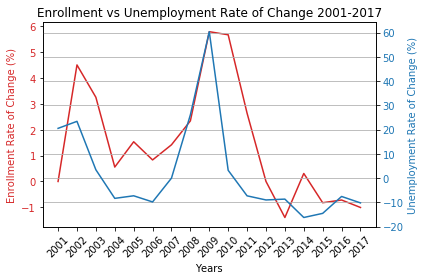

In [66]:
years01to17 = ["2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
enrollmentByYearRateOfChange = enrollmentByYear["Enrollment Annual Rate of Change"]
employ01to17RateOfChange = employ01to17_df["Unemployment Annual Rate of Change"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Enrollment Rate of Change (%)', color=color)
ax1.plot(years01to17, enrollmentByYearRateOfChange, color=color)
ax1.tick_params(axis='y', labelcolor=color)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Unemployment Rate of Change (%)', color=color)  # we already handled the x-label with ax1
ax2.set_title("Enrollment vs Unemployment Rate of Change 2001-2017")
ax2.plot(years01to17, employ01to17RateOfChange, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig("Enrollment vs Unemployment - Rate of Change 2001-2017_fig.png")

fig.tight_layout()  
plt.grid()
plt.show()


In [67]:
employ01to17_df = employment_df.drop(employment_df.index[[0, 18]])
employ01to17_df.head()

,Year,Initial Jobless Claims,Unemployment Rate,Labor Force Participation,Unemployment Annual Rate of Change,Participation Annual Rate of Change,Jobless Claims Annual Rate of Change
1,2001,405246,4.7,66.8,20.512821,-0.298507,17.123121
2,2002,404283,5.8,66.6,23.404255,-0.299401,-0.237633
3,2003,402154,6.0,66.2,3.448276,-0.600601,-0.526611
4,2004,342117,5.5,66.0,-8.333333,-0.302115,-14.928858
5,2005,330988,5.1,66.0,-7.272727,0.000000,-3.252981


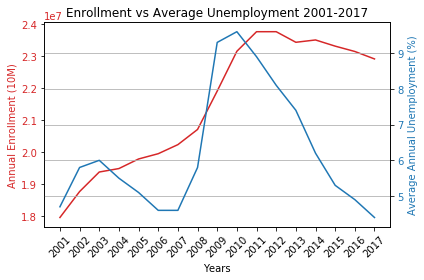

In [68]:
years01to17 = ["2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
enrollmentByYearGrandTotal = enrollmentByYear["EF2001D1.Grand total"]
employ01to17_dfRate = employ01to17_df["Unemployment Rate"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Annual Enrollment (10M)', color=color)
ax1.plot(years01to17, enrollmentByYearGrandTotal, color=color)
ax1.tick_params(axis='y', labelcolor=color)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Annual Unemployment (%)', color=color)  # we already handled the x-label with ax1
ax2.set_title("Enrollment vs Average Unemployment 2001-2017")

ax2.plot(years01to17, employ01to17_dfRate, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig("Enrollment vs Average Unemployment 2001-2017_fig.png")

fig.tight_layout()  
plt.grid()
plt.show()

In [69]:
#remove 2001 to 2004 data from employment graph so that we can layer the plots with Completion data later
enrollmentByYear05to17 = enrollmentByYear.drop(enrollmentByYear.index[[0, 1, 2, 3]])
enrollmentByYear05to17

,EF2001D1.Grand total,Enrollment Annual Rate of Change
year,,
2005,19792638.0,1.534329
2006,19957444.0,0.832663
2007,20240347.0,1.417531
2008,20714313.0,2.341689
2009,21913240.0,5.787916
2010,23155497.0,5.668979
2011,23766408.0,2.638298
2012,23767003.0,0.002504
2013,23436250.0,-1.391648


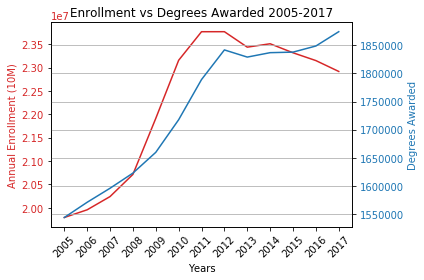

In [70]:
years05to17 = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
enrollmentByYear05to17Total = enrollmentByYear05to17["EF2001D1.Grand total"]
totalDegrees = completion_df5["Total_Degree"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Annual Enrollment (10M)', color=color)
ax1.plot(years05to17, enrollmentByYear05to17Total, color=color)
ax1.tick_params(axis='y', labelcolor=color)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Degrees Awarded', color=color)  # we already handled the x-label with ax1
ax2.set_title("Enrollment vs Degrees Awarded 2005-2017")

ax2.plot(years05to17, totalDegrees, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig("Enrollment vs Average Unemployment 2001-2017_fig.png")

fig.tight_layout()  
plt.grid()
plt.show()

In [71]:
#have to remove columns (years) that do not overlap
employ05to17_df = employment_df.drop(employment_df.index[[0, 1, 2, 3, 4, 18]])
employ05to17_df

,Year,Initial Jobless Claims,Unemployment Rate,Labor Force Participation,Unemployment Annual Rate of Change,Participation Annual Rate of Change,Jobless Claims Annual Rate of Change
5,2005,330988,5.1,66.0,-7.272727,0.000000,-3.252981
6,2006,312092,4.6,66.2,-9.803922,0.303030,-5.708968
7,2007,320683,4.6,66.0,0.000000,-0.302115,2.752714
8,2008,417708,5.8,66.0,26.086957,0.000000,30.255735
9,2009,574279,9.3,65.4,60.344828,-0.909091,37.483362
10,2010,458808,9.6,64.7,3.225806,-1.070336,-20.107126
11,2011,408679,8.9,64.1,-7.291667,-0.927357,-10.925921
12,2012,374863,8.1,63.7,-8.988764,-0.624025,-8.274465
13,2013,343625,7.4,63.3,-8.641975,-0.627943,-8.333178
14,2014,308342,6.2,62.9,-16.216216,-0.631912,-10.267879


In [72]:
#remove 2001 to 2004 data from employment graph so that we can layer the plots with Completion data later
enrollmentByYear05to17 = enrollmentByYear.drop(enrollmentByYear.index[[0, 1, 2, 3]])
enrollmentByYear05to17

,EF2001D1.Grand total,Enrollment Annual Rate of Change
year,,
2005,19792638.0,1.534329
2006,19957444.0,0.832663
2007,20240347.0,1.417531
2008,20714313.0,2.341689
2009,21913240.0,5.787916
2010,23155497.0,5.668979
2011,23766408.0,2.638298
2012,23767003.0,0.002504
2013,23436250.0,-1.391648


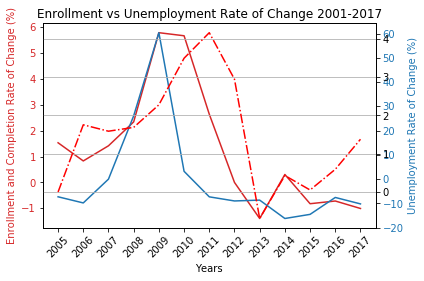

In [73]:
years05to17 = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
enrollmentByYear05to17RateOfChange = enrollmentByYear05to17["Enrollment Annual Rate of Change"]
employ05to17RateOfChange = employ05to17_df["Unemployment Annual Rate of Change"]
completionRoC = completion_df5["Completion Annual Rate of Change"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Enrollment and Completion Rate of Change (%)', color=color)
ax1.plot(years05to17, enrollmentByYear05to17RateOfChange, color=color)
ax1.tick_params(axis='y', labelcolor=color)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3=ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Unemployment Rate of Change (%)', color=color)  # we already handled the x-label with ax1
ax2.set_title("Enrollment vs Unemployment Rate of Change 2001-2017")
ax2.plot(years05to17, employ05to17RateOfChange, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3.plot(years05to17, completionRoC, color='r', ls='-.')




plt.savefig("Enrollment and Completions vs Unemployment - Rate of Change 2001-2017_fig.png")

fig.tight_layout()  
plt.grid()
plt.show()

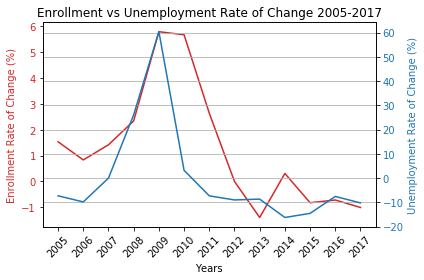

In [74]:
years05to17 = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
enrollmentByYear05to17RateOfChange = enrollmentByYear05to17["Enrollment Annual Rate of Change"]
employ05to17RateOfChange = employ05to17_df["Unemployment Annual Rate of Change"]
#completionRoC = completion_df5["Completion Annual Rate of Change"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Enrollment Rate of Change (%)', color=color)
ax1.plot(years05to17, enrollmentByYear05to17RateOfChange, color=color)
ax1.tick_params(axis='y', labelcolor=color)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#ax3=ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Unemployment Rate of Change (%)', color=color)  # we already handled the x-label with ax1
ax2.set_title("Enrollment vs Unemployment Rate of Change 2005-2017")
ax2.plot(years05to17, employ05to17RateOfChange, color=color)
ax2.tick_params(axis='y', labelcolor=color)

#ax3.plot(years05to17, completionRoC, color='r', ls='-.')

# plt.savefig("Enrollment and Completions vs Unemployment - Rate of Change 2001-2017_fig.png")

fig.tight_layout()  
plt.grid()
plt.show()